# Calculating vegetation loss using function imports from raster_analysis.py
In this notebook, I use functions defined in the raster_analysis.py file to read raster layers, compute their NDVI and perform change detection to assess vegetation loss in the Andalusia region of Spain due to the wildfire event in July 2017. The following functions are used: <br>
* load_data() - reads the raster's red and NIR bands into float numpy arrays
* plt_raster() - visualizes the input numpy array as a map
* ndvi() - calculates ndvi from the input raster
* ndvi_change() - calculates loss of vegetation or delta NDVI between the input rasters

In [15]:
import raster_analysis

### Function 1: Load files, read red and NIR bands in numpy arrays and convert to float type

In [18]:
red, nir = raster_analysis.load_data("data","20170701T111051.tif")
red
# The functions returns a tuple and they're read into two variables here, red and nir

array([[ 614.,  542.,  625., ..., 1293., 1299., 1296.],
       [ 672.,  583.,  659., ..., 1308., 1301., 1292.],
       [ 657.,  634.,  673., ..., 1318., 1301., 1288.],
       ...,
       [ 743.,  723.,  739., ..., 1039., 1007., 1194.],
       [ 724.,  728.,  750., ..., 1007.,  964., 1093.],
       [ 721.,  761.,  773., ..., 1087., 1114., 1610.]], dtype=float32)

### Function 2: Plotting a raster band based numpy array in terrain coloramp

()

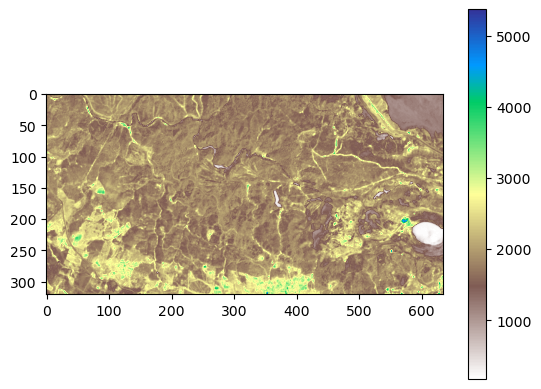

In [19]:
raster_analysis.plt_raster(nir)
# Plots NIR band values in the image

### Function 3: Calculate NDVI

()

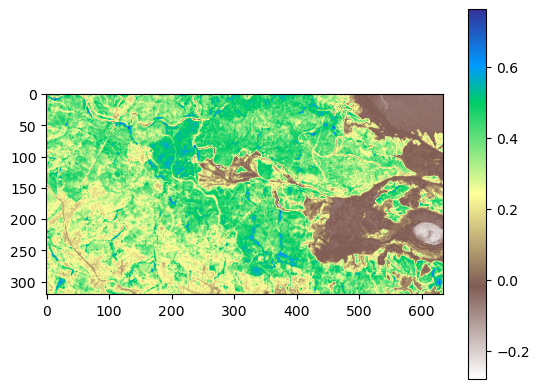

In [20]:
# Calculating NDVI for before event raster and visualizing

ndvi_ = raster_analysis.ndvi("data", "20170701T111051.tif")
# Calculates NDVI from the input raster image

raster_analysis.plt_raster(ndvi_)
# Plots the NDVI generated from the raster in the previous step

()

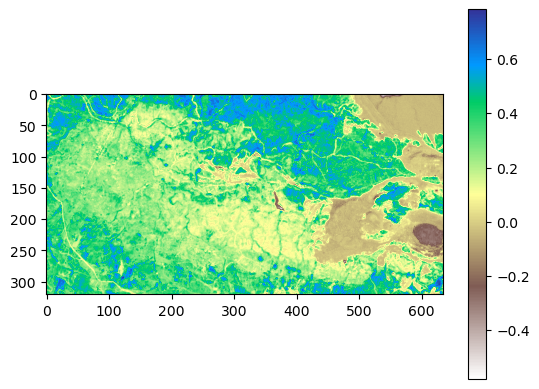

In [21]:
# Calculating NDVI for after event raster and visualizing

ndvi_2 = raster_analysis.ndvi("data", "20181029T111149.tif")
raster_analysis.plt_raster(ndvi_2)

### Function 4: Calculate change in NDVI between rasters of two timestamps

()

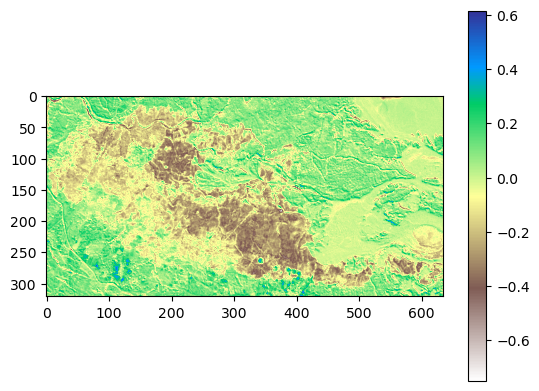

In [22]:
change = raster_analysis.ndvi_change("data", "20170701T111051.tif", "20181029T111149.tif")
raster_analysis.plt_raster(change)

### Comparing with Copernicus Emergency service area deliantion
Source: [Damaged Area Rapid Mapping](https://emergency.copernicus.eu/mapping/system/files/components/EMSN060_01ANDALUSIA_P1-6-FIRESEVERITY-NDVI_OVERVIEWA2_v1_300dpi.pdf)

It can be visually noted that the brown area in the previous map coincides with the damaged area delineated by the Emergency service.

In [23]:
import folium
import requests
import geopandas as gpd

damaged_area = 'data/damaged_aoi_.geojson'
damaged_area

m = folium.Map(location = [37.70803, -6.64465], zoom_start = 13, control_scale=True)

folium.GeoJson(damaged_area).add_to(m)
m

C:\Users\prkra\AppData\Local\Temp\ipykernel_25348\2093435343.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
